---
title: "Tensorflow 2.0 Tutorial ch5.3 - Fashion MNIST"
date: 2020-04-20T17:08:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "분류"
  - "다항분류"
  - "Binary Classification"
  - "Classification"
  - "Fashion MNIST"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch5.3 - Fashion MNIST
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)
- [Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트](https://chloevan.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)
- [Tensorflow 2.0 Tutorial ch5.1 - 분류](https://chloevan.github.io/python/tensorflow2.0/ch5_1_binary_classification/)
- [Tensorflow 2.0 Tutorial ch5.2 - 다항분류](https://chloevan.github.io/python/tensorflow2.0/ch5_2_multi_classification/)

## I. 개요[^1]

`MNIST`는 머신러닝의 고전적인 문제로 손으로 쓴 숫자 글씨를 모아놓은 데이터 세트이며, `Fashion MNIST`는 손글씨가 아닌 옷과 신발, 가방의 이미지 등을 모아 놓는다. 그레이스케일 이미지[^2]라는 점과 범주의 수가 10개라는 점, 각 이미지의 크기가 28X28 픽셀이라는 점은 `MNIST`와 동일하지만 좀 더 어려운 문제로 평가됩니다. 

라벨의 정의는 아래와 같습니다.

| 라벨 	| 범주 	|
|:----:	|:-----------:	|
| 0 	| 티셔츠/상의 	|
| 1 	| 바지 	|
| 2 	| 스웨터 	|
| 3 	| 드레스 	|
| 4 	| 코트 	|
| 5 	| 샌들 	|
| 6 	| 셔츠 	|
| 7 	| 운동화 	|
| 8 	| 가방 	|
| 9 	| 부츠 	|


[^1]: 책의 교재에도 각주로 설명이 되어 있지만, 텐서플로 홈페이지의 `첫 번째 신경망 훈련하기: 기초적인 분류 문제` 페이지의 일부 내용을 참고하였다. 
[^2]: 컬러 이미지를 밝기 정보만 남긴 회색조로 변환한 이미지를 뜻함. 


## II. 데이터 불러오기 

`Fashion MNIST` 데이터세트는 `tf.keras`에 기본으로 탑재가 되어 있기 때문에 간단하게 불러올 수 있다. 

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import pandas as pd
import tensorflow as tf
from tabulate import tabulate

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(len(train_X), len(test_X))

60000 10000


훈련 데이터는 60,000장, 테스트 데이터는 10,000장의 패션 이미지를 포함하고 있습니다. 데이터세트를 불러온 후에는 이 데이터가 어떻게 생겼는지 확인해봐야 합니다. 

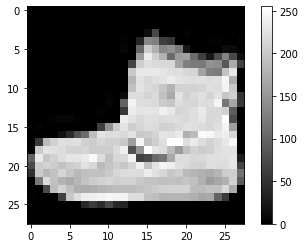

9


In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

`imshow()` 이미지를 그래프의 형태로 표시 할 수 있고, `colorbar()` 함수는 그래프 옆에 색상의 값 정보를 (bar) 형태로 표시할 수 있습니다. 데이터의 이미지가 0에서 255까지의 값을 가지는 28X28 픽셀 크기의 2차원 이미지라는 것을 확인할 수 있습니다. 

## III. 데이터 정규화

데이터를 정규화를 진행합니다. 여기에서는 최대값과 최소값을 이미 알고 있기 때문에 이미지의 각 픽셀값을 255로 나누기만 하면 0.0~1.0사이의 값으로 정규화됩니다. 

In [ ]:
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

모든 데이터가 0에서 1사이의 값을 갖기 때문에 데이터 `정규화`가 잘 된 것을 알 수 있습니다. 이 다음에 진행해야 하는 것은 `train_Y`와 `test_Y`에 원-핫 인코딩으로 바꾸는 부분입니다. [(이전 강의 참조)](https://chloevan.github.io/python/tensorflow2.0/ch5_2_multi_classification/)

`to_categorical` 함수를 이용해 정답 행렬을 원-핫 인코딩으로 바꾸면 아래와 같습니다.

```python
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=10)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=10)
```

이 때 9는 [0,0,0,0,0,0,0,0,0,1]로 바뀔 것입니다. 만약에 분류해야 하는 것이 `100`이라면 어떻게 해야 할까요? 이러한 비효율성을 제거해줄 때 희소 행렬이라는 원리를 이용합니다. 행렬이 클 경우 수 많은 0을 위한 메모리를 모두 확보하는 것 자체가 매우 시스템적으로 낭비이기 때문입니다. 이렇게 이미지 분류의 경우에는 원-핫 인코딩보다는 희소행렬 원리를 이용해서 작성하는 경우가 많으니 참고하기를 바랍니다. 

## IV. 딥러닝 모형

이제 모형을 생성합니다. 

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)), 
  tf.keras.layers.Dense(units=128, activation="relu"), 
  tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


- 여기에서 주의해서 봐야하는 것은 `loss`에 `sparse_categorical_crossentropy`로 기재하면 별도의 데이터 전처리 없이 희소 행렬을 나타내는 데이터를 정답 행렬로 사용할 수 있습니다. 
- 또한, `Dense`대신에 `Flatten`이 사용되었는데, 이는 다차원 데이터를 1차원으로 정렬하는 역할을 합니다. 
- `Adam()`의 기본값은 0,001로 매우 작습니다.[^3]


[^3]: 이렇게 기본값을 작게 해놓은 이유는 이 때의 값이 가장 좋았다는 [논문](https://arxiv.org/pdf/1412.6980.pdf)에 근거합니다. 물론 이를 이해하려면 수식을 전체 이해해야 하며, 추가적으로 성능 비교를 하려면 더 크거나 작은 값을 시도해야 합니다.

In [7]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 3.2494 - accuracy: 0.6631 - val_loss: 0.8940 - val_accuracy: 0.6771
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.7281 - accuracy: 0.7219 - val_loss: 0.6937 - val_accuracy: 0.7261
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6337 - accuracy: 0.7550 - val_loss: 0.6646 - val_accuracy: 0.7526
Epoch 4/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5903 - accuracy: 0.7735 - val_loss: 0.6148 - val_accuracy: 0.7820
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5758 - accuracy: 0.7828 - val_loss: 0.5888 - val_accuracy: 0.7907
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5571 - accuracy: 0.7890 - val_loss: 0.5649 - val_accuracy: 0.7797
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5469 - accuracy: 0.7969 - val_loss: 0.5736 - val_accuracy:

## V. 모형 결과 확인

학습 출력 결과를 보면 훈련 데이터의 정확도는 점점 증가하고, 검증 데이터의 정확도는 일정한 수준으로 유지됩니다. 전체 학습 과정을 조망하기 위해 `history` 변수에 저장된 학습 결과를 시각화 합니다. 

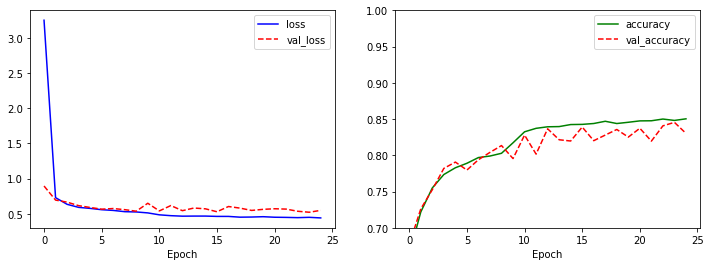

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

검증 데이터의 손실이 감소하다가 시간이 지날수록 서서히 증가하는 과적합 현상을 확인할 수 있는데, 이를 막기 위해서는 `tf.keras.callbacks.EarlyStopping`을 사용합니다. 

In [9]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.8246


[0.5697438716888428, 0.8245999813079834]

테스트 데이터에 대한 평가 정확도는 88.5%가 나왔습니다. 괜찮은 수치 같지만, 네트워크 구조 변경과 다른 학습 기법을 사용해서 정확도를 90%이상으로 끌어 올려야 합니다. 이를 컨볼루션 신경망(`CNN`)에서 그 방법을 확인합니다. 

## VI. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch5_3_Fashion_MNIST.ipynb) 

## VII. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.